<a href="https://colab.research.google.com/github/SaumilShah-7/Toxic-Comment-Classification-Challenge-Kaggle/blob/master/Toxic_Comment_Classification_(GRU%2BFastText%2BGlove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing import text, sequence

2.2.0


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 49.2MB/s]
 42% 11.0M/26.3M [00:00<00:01, 10.2MB/s]
100% 26.3M/26.3M [00:00<00:00, 30.1MB/s]
 51% 12.0M/23.4M [00:00<00:00, 122MB/s]
100% 23.4M/23.4M [00:00<00:00, 150MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 45.8MB/s]


In [0]:
!unzip -q -o train.csv.zip
!unzip -q -o test.csv.zip
!unzip -q -o test_labels.csv.zip
!rm train.csv.zip
!rm test.csv.zip
!rm test_labels.csv.zip

In [0]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [0]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Empty comments in train dataset: 0


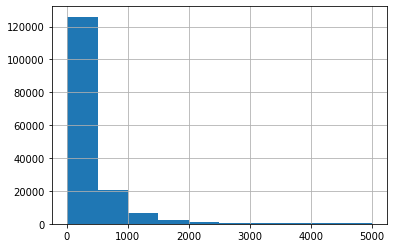

In [0]:
train.comment_text.str.len().hist()
print("Empty comments in train dataset:", len(train[train.comment_text.str.len()==0]))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


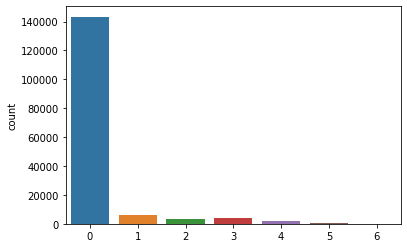

In [0]:
import seaborn as sns
sns.countplot(train[list(train.columns)[2:]].sum(axis=1))

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
none             143346
dtype: int64


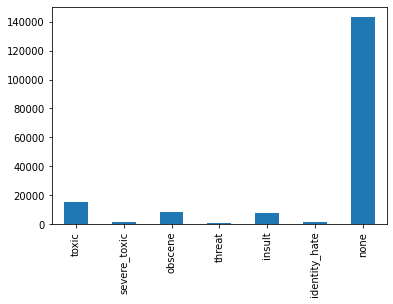

In [0]:
train['none'] = 1 - train[list(train.columns)[2:]].max(axis=1)

train[list(train.columns)[2:]].sum().plot(kind='bar')
print(train[list(train.columns)[2:]].sum())

In [0]:
import regex as re
!pip install Unidecode
from unidecode import unidecode

words_only = re.compile(r'[^A-Za-z\']')
def clean_text(x):
    x_ascii = unidecode(x)
    x_clean = words_only.sub(' ', x_ascii)
    return x_clean

train['clean_text'] = train['comment_text'].apply(lambda x: clean_text(x))
test['clean_text'] = test['comment_text'].apply(lambda x: clean_text(x))

     |████████████████████████████████| 245kB 6.0MB/s 


In [0]:
print(train['comment_text'][1])
print(train['clean_text'][1])

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
D'aww  He matches this background colour I'm seemingly stuck with  Thanks    talk         January           UTC 


In [0]:
train['clean_text'].fillna('something')
print(train[train.clean_text=='something'])
test['clean_text'].fillna('something')
print(test[test.clean_text=='something'])

Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, none, clean_text]
Index: []
Empty DataFrame
Columns: [id, comment_text, clean_text]
Index: []


In [0]:
max_features = 100000

In [0]:
t = text.Tokenizer(num_words=max_features)
t.fit_on_texts(list(train['clean_text'])+list(test['clean_text']))

print(len(t.word_index))

343984


In [0]:
t.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'and': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'are': 18,
 'have': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'an': 27,
 'wikipedia': 28,
 'page': 29,
 'my': 30,
 'from': 31,
 'by': 32,
 'at': 33,
 'do': 34,
 'about': 35,
 'so': 36,
 'me': 37,
 'what': 38,
 'can': 39,
 'all': 40,
 'there': 41,
 'has': 42,
 'talk': 43,
 'would': 44,
 'no': 45,
 'will': 46,
 'one': 47,
 'like': 48,
 'just': 49,
 'please': 50,
 'they': 51,
 'he': 52,
 'we': 53,
 'which': 54,
 'any': 55,
 'should': 56,
 'been': 57,
 "don't": 58,
 'more': 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'see': 63,
 'here': 64,
 'think': 65,
 'also': 66,
 'fuck': 67,
 'his': 68,
 "it's": 69,
 "i'm": 70,
 'because': 71,
 'know': 72,
 'up': 73,
 'how': 74,
 'people': 75,
 'out': 76,
 'why': 77,
 'only': 78,
 'edit': 79,
 'when': 80,
 'am': 81,
 '

In [0]:
X_train = t.texts_to_sequences(train['clean_text'])
X_test = t.texts_to_sequences(test['clean_text'])

print(X_train[0])

[718, 77, 1, 140, 131, 181, 30, 697, 4311, 9860, 1123, 86, 366, 51, 2133, 13632, 49, 6489, 15, 60, 2545, 151, 7, 2747, 33, 116, 1209, 15712, 2433, 5, 50, 58, 254, 1, 368, 31, 1, 43, 29, 144, 70, 3808, 89]


In [0]:
l = list(map(len, X_train))
print('Min: %d, Mean: %d, Q3: %d, Max: %d' %(min(l), sum(l)/len(l), np.percentile(l, 75), max(l)))

Min: 0, Mean: 66, Q3: 74, Max: 1401


In [0]:
maxlen = 200
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

y_train = train[list(train.columns)[2:-2]].values

print(x_train.shape, y_train.shape)
print(x_test.shape)
print(list(train.columns)[2:-2])

(159571, 200) (159571, 6)
(153164, 200)
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

--2020-05-25 06:32:15--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  9.59MB/s    in 2m 33s  

2020-05-25 06:34:49 (9.52 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]

--2020-05-25 06:34:52--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2020-05-25 06:34:52--  https://nlp.sta

In [0]:
!unzip -q -o crawl-300d-2M.vec.zip 
!unzip -q -o glove.twitter.27B.zip
!rm crawl-300d-2M.vec.zip
!rm glove.twitter.27B.zip

In [0]:
def get_coefs(word,*arr):
  return word, np.asarray(arr, dtype='float32')

embeddings_index_ft = dict(get_coefs(*o.strip().split()) for o in open('crawl-300d-2M.vec'))
embeddings_index_gl = dict(get_coefs(*o.strip().split()) for o in open('glove.twitter.27B.200d.txt'))

In [0]:
something = np.zeros((500,))
something[:300,] = embeddings_index_ft.get("something")
something[300:,] = embeddings_index_gl.get("something")
# print(something)

In [0]:
# from textblob import TextBlob
word_process = re.compile(r'[^A-Za-z]')

embed_size = 500
words_not_found = []
corrected = []

word_index = t.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words: 
      break
    if embeddings_index_ft.get(word) is not None: 
      embedding_matrix[i,:300] = embeddings_index_ft.get(word)
      if embeddings_index_gl.get(word) is not None:
        embedding_matrix[i,300:] = embeddings_index_gl.get(word)
    else:
      # word2 = TextBlob(word).correct()
      word2 = word_process.sub('', word)
      if embeddings_index_ft.get(word2) is not None:
        corrected.append((word, word2))
        embedding_matrix[i,:300] = embeddings_index_ft.get(word2)
        if embeddings_index_gl.get(word2) is not None:
          embedding_matrix[i,300:] = embeddings_index_gl.get(word2)
      else:
        words_not_found.append(word)
        embedding_matrix[i]=something

In [0]:
print(len(words_not_found))
print(words_not_found)

print(len(corrected))
print(corrected)

23033
['npov', 'youfuck', "''''''", 'fffa', "''''", "'''", 'dixz', 'gfdl', 'helloz', 'fucksex', 'yourselfgo', 'roycy', "''", 'roflspam', 'niggors', 'mainpagebg', 'schabig', 'bonergasm', 'bitchbot', 'donkeysex', 'mothjer', 'phck', 'fggt', 'fdffe', 'vandalizer', 'godstars', 'faggt', 'titoxd', 'reedelliot', 'afghooni', 'niggerjew', 'philippineslong', 'curps', 'gayyour', 'oompapa', 'barbercallum', 'cuntnlu', 'hanibal', 'jelaton', 'offfuck', 'swyers', 'ckhacked', 'drogon', 'analanal', "sex'butt", 'vaginapenis', "''''''''''", 'deneid', 'zeuphoris', 'peenus', 'honkhonk', 'wikilove', 'pagedelete', 'notrhbysouthbanof', 'cuntliz', 'fceb', 'gurdyhurdy', 'verment', 'keiffer', 'motherfuckerdie', 'homopetersymonds', 'criminalwar', 'bunksteve', 'shdh', 'neiln', 'kelapstick', 'marcolfuck', 'boymamas', 'ghobrial', 'obma', 'radicalnigger', 'sitush', 'misterwiki', 'wikiprojects', 'securityfuck', 'serbiafack', 'kfuckity', 'goddned', 'supertr', 'delanoy', 'youbollocks', 'yyn', 'ballsballs', 'veggietales', 

In [0]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Conv1D, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

def get_model():
  inp = Input(shape=(maxlen, ))
  x = Embedding(nb_words, embed_size, weights=[embedding_matrix])(inp)
  x = SpatialDropout1D(0.5)(x)
  x = Bidirectional(LSTM(40, return_sequences=True))(x)
  x, x_h, x_c = Bidirectional(GRU(40, return_sequences=True, return_state=True))(x)
  # x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  conc = concatenate([avg_pool, x_h, max_pool])
  outp = Dense(6, activation="sigmoid")(conc)
  
  model = Model(inputs=inp, outputs=outp)
  adam = optimizers.Adam(clipvalue=1.)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

  return model

In [0]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 500)     50000000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 200, 500)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 200, 80)      173120      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

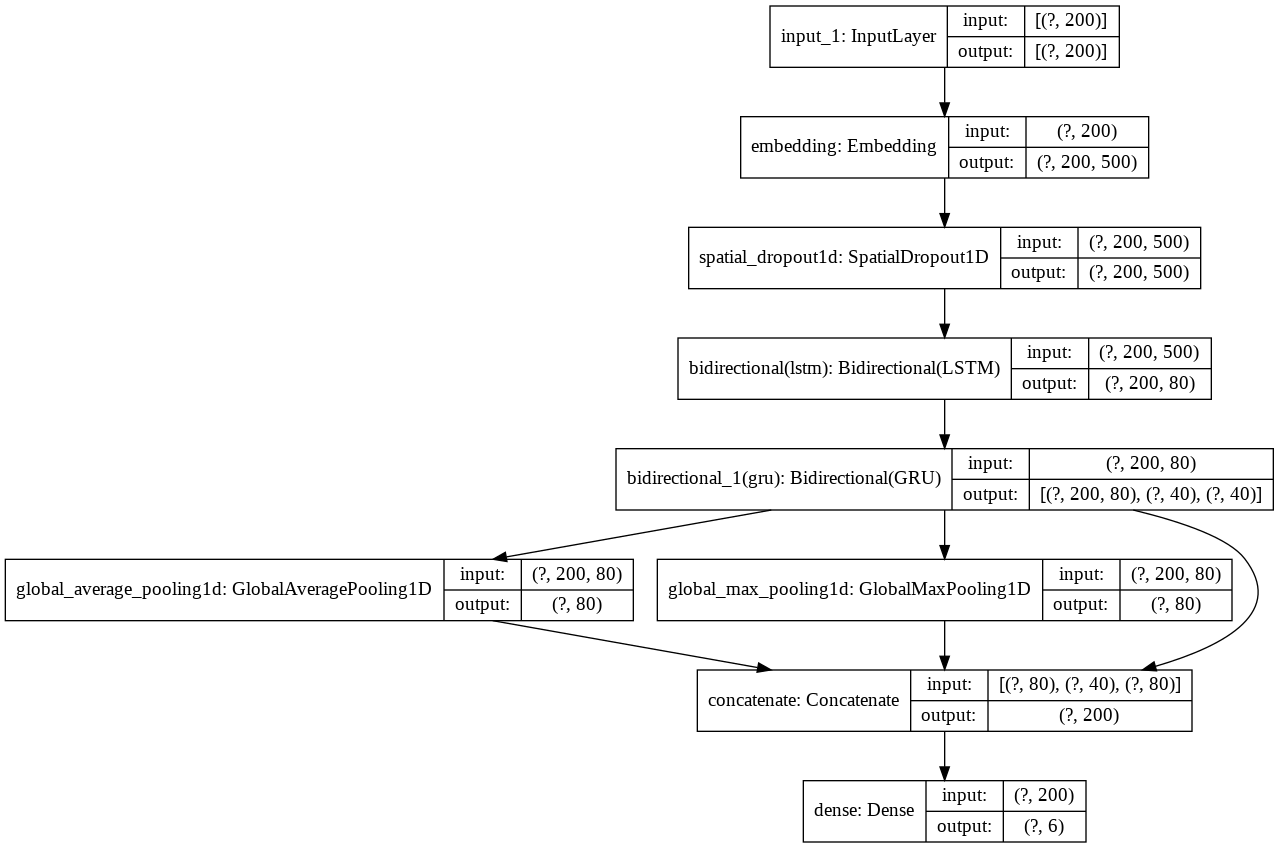

In [0]:
print(model.summary())
plot_model(model, show_shapes=True)

In [0]:
# from sklearn.model_selection import train_test_split

# x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.95, random_state=233)

In [0]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from sklearn.metrics import roc_auc_score

class RocCallback(Callback):
  def __init__(self, validation_data):
    self.x_val = validation_data[0]
    self.max_score = 0
    self.y_val = validation_data[1]

  def on_epoch_end(self, epoch, logs={}):
    y_pred_val = self.model.predict(self.x_val)
    roc_val = roc_auc_score(self.y_val, y_pred_val)
    print(' - Roc-auc_val: %.6f \n' % roc_val)
    if roc_val > self.max_score:
      self.model.save_weights('best_model.h5', )
      print('Saving model weights at Epoch: %d, Roc-auc_val: %.6f \n'  % (epoch+1, roc_val))
      self.max_score = roc_val
    return

# roc = RocCallback(validation_data=(x_val, y_val))

In [0]:
from sklearn.model_selection import KFold
import tensorflow.keras.backend as K

num_folds = 5
batch_size = 32
epochs = 2

predict = np.zeros((test.shape[0],6))
oof_predict = np.zeros((train.shape[0],6))
scores = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=239)

for train_index, val_index in kf.split(x_train):
  kf_y_train, kf_y_val = y_train[train_index], y_train[val_index]
  kf_x_train, kf_x_val = x_train[train_index], x_train[val_index]
  
  K.clear_session()

  model = get_model()
  ra_val = RocCallback(validation_data=(kf_x_val, kf_y_val))
  model.fit(kf_x_train, kf_y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[ra_val])

  model.load_weights('best_model.h5')
  predict += model.predict(x_test, batch_size=batch_size, verbose=1) / num_folds

  oof_predict[val_index] = model.predict(kf_x_val, batch_size=batch_size, verbose=1)
  cv_score = roc_auc_score(kf_y_val, oof_predict[val_index])
  scores.append(cv_score)
  print('score: ', cv_score)

print('Done')
print('Total CV score is %.6f' % np.mean(scores))

Epoch 1/2
3990/3990 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9858 - Roc-auc_val: 0.986688 

Saving model weights at Epoch: 1, Roc-auc_val: 0.986688 

3990/3990 [==============================] - 2435s 610ms/step - loss: 0.0518 - accuracy: 0.9858
Epoch 2/2
3990/3990 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9853 - Roc-auc_val: 0.988302 

Saving model weights at Epoch: 2, Roc-auc_val: 0.988302 

998/998 [==============================] - 70s 71ms/step
score:  0.9883021513441018
Epoch 1/2
3925/3990 [============================>.] - ETA: 38s - loss: 0.0514 - accuracy: 0.9898

In [0]:
# batch_size = 32
# epochs = 2

# hist = model.fit(x_tra, y_tra, batch_size=batch_size, callbacks=[roc], epochs=epochs, validation_data=(x_val, y_val), verbose=1)

In [0]:
# model.load_weights('model.h5')
# y_pred = model.predict(x_test, batch_size=1024)

In [0]:
submid = pd.DataFrame({'id': test['id']})
submission = pd.concat([submid, pd.DataFrame(predict, columns = list(train.columns)[2:-2])], axis=1)
submission.to_csv('submission.csv', index=False)